In [2]:
%load_ext autoreload
%autoreload 2

from neuralarttools.canvas import *
from neuralarttools.util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Modifying an image

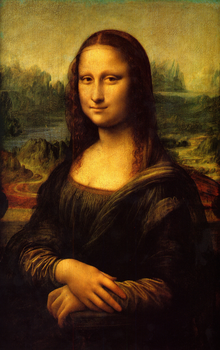

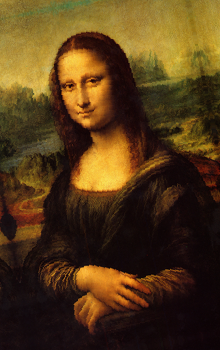

In [3]:
img1 = load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', (220, 350))
img2 = modify_canvas(img1, {'rot_const': 0.2})
display(img1)
display(img2)

### Full list of modifications and defaults

* center: normalized center point of image, or origin of canvas (default (0.5, 0.5))
* shift: translation X and Y as a fraction of width and height
* stretch: vertical and horizontal stretch of image (default 1.0, 1.0)
* zoom: zoom in (>1.0) or out (<1.0), default (1.0)
* expand: goes with zoom
* rot_const: constant rotation around center, in radians
* rot_ang: rotation as a function of angle from center, in radians
* rot_dst: rotation as a function of distance from center, in radians
* spiral_margin, spiral_periods: spiraling around center, distance and how many periods to go
* noise_rate, noise_margin: Perlin noise speed, and maximum movement

In [4]:

config_identity = {
    'center':(0.5, 0.5),
    'shift':(0.0, 0.0), 'stretch':(1.0, 1.0), 
    'zoom':1.0, 'expand':0, 
    'rot_const':0.0, 'rot_ang':0, 'rot_dst':0,
    'spiral_margin':0, 'spiral_periods':0,
    'noise_rate':(0, 0), 'noise_margin':(0, 0)
}

config = {
    'shift':(0.01, -0.01), 'stretch':(1.01, 0.99), 
}

img = load_image('https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/The_Scream.jpg/471px-The_Scream.jpg')
view_canvas(config, (320, 320), 40, img=img, animate=True)

### Perlin noise

In [5]:
config = {
    'noise_rate':(0.52, 0.35), 'noise_margin':(2.4, 4.3)
}

view_canvas(config, (500, 500), 30, animate=True)

### A bunch of different configs

Like masks, can save to disk and then display, to save on notebook size. Run the next cell to generate the movies first.

In [16]:
configs = [
    {'center':(0.75, 0.25), 'rot_const':0.03, 'rot_ang':0, 'rot_dst':0.0}, 
    {'spiral_margin':0.02, 'spiral_periods':4}, 
    {'shift':(-0.01, 0.0), 'stretch':(1.0, 1.0), 'zoom':1.0, 'expand':0.5}, 
    {'rot_const':0.0, 'rot_ang':0.02, 'rot_dst':0}, 
    {'rot_const':0.0, 'rot_ang':0, 'rot_dst':0.0001}, 
    {'zoom':0.99, 'expand':0}
]

img = load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', (320, 360))
for c, config in enumerate(configs):    
    save_canvas_video('_example_canvas_%02d.mp4'%c, config, (320, 360), 60, img=img)

After generating them, you can display them.

In [15]:
videos = ['_example_canvas_%02d.mp4'%c for c in range(len(configs))]
display_local_videos(videos)